In [1]:
# 下載配件
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# 讀入檔案並作遺失值處理
df = pd.read_csv("/Users/user/Desktop/HDDA_FinalProject/brazilian-cities/BRAZIL_CITIES.csv", sep=";", decimal=",")
df.head()
df.info()
df.fillna(0., inplace=True)
df.fillna(0., inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
CITY                      5573 non-null object
STATE                     5573 non-null object
CAPITAL                   5573 non-null int64
IBGE_RES_POP              5565 non-null float64
IBGE_RES_POP_BRAS         5565 non-null float64
IBGE_RES_POP_ESTR         5565 non-null float64
IBGE_DU                   5563 non-null float64
IBGE_DU_URBAN             5563 non-null float64
IBGE_DU_RURAL             5492 non-null float64
IBGE_POP                  5565 non-null float64
IBGE_1                    5565 non-null float64
IBGE_1-4                  5565 non-null float64
IBGE_5-9                  5565 non-null float64
IBGE_10-14                5565 non-null float64
IBGE_15-59                5565 non-null float64
IBGE_60+                  5565 non-null float64
IBGE_PLANTED_AREA         5570 non-null float64
IBGE_CROP_PRODUCTION_$    5570 non-null float64
IDHM Ranking 2010         5565 no

In [3]:
# 改變變數型態(object -> float)以利後續做圖
df['LONG'] = df['LONG'].astype('float64')
df['LAT'] = df['LAT'].astype('float64')
df['GDP_CAPITA'] = df['GDP_CAPITA'].astype('float64')
df['IDHM'] = df['IDHM'].astype('float64')
df['STATE'] = df['STATE'].astype('str')
# value_counts()属性获知每一个Name元素出现的频率是1或多次
df["STATE"].value_counts()

MG    853
SP    645
RS    498
BA    418
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    186
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: STATE, dtype: int64

In [4]:
# remove zero values
mask1= df["LONG"] != 0
mask2 = df["LAT"] !=0 
mask3 = df['CAPITAL'] ==1

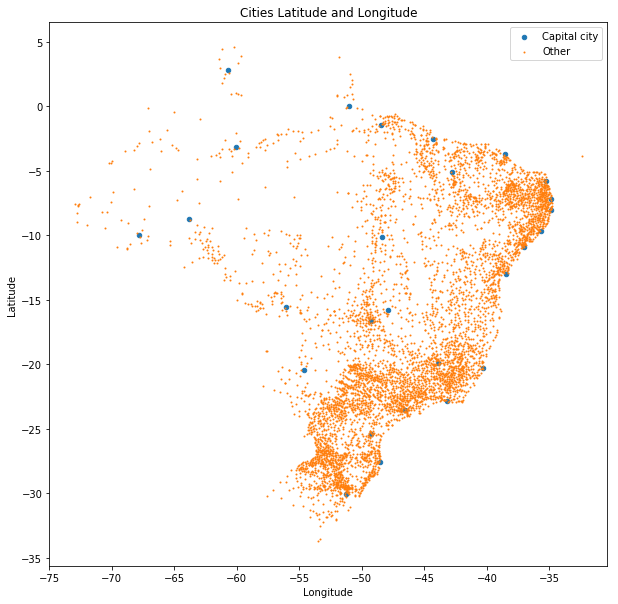

In [5]:
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Cities Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df[mask1&mask2&mask3]["LONG"], df[mask1&mask2&mask3]["LAT"], s=20, alpha=1, label='Capital city')
plt.scatter(df[mask1&mask2&~mask3]["LONG"], df[mask1&mask2&~mask3]["LAT"], s=1, alpha=1, label='Other')
plt.legend()
plt.show()

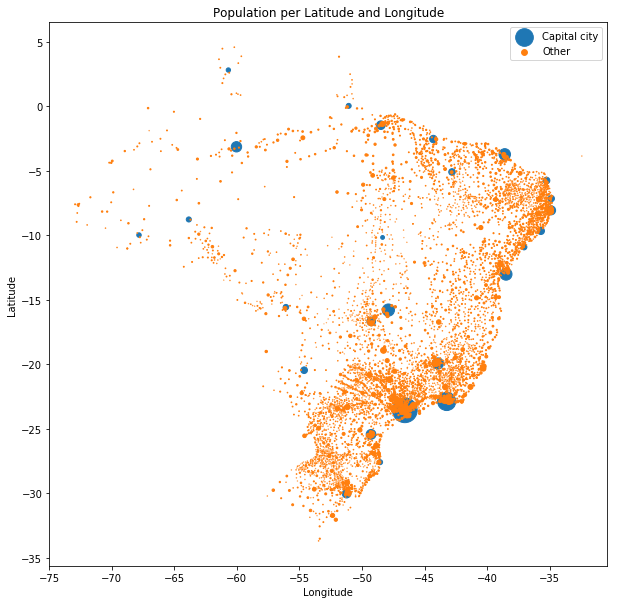

In [39]:
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Population per Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
scale_factor = 20000
plt.scatter(df[mask1&mask2&mask3]["LONG"], df[mask1&mask2&mask3]["LAT"], s=df[mask1&mask2&mask3]["ESTIMATED_POP"]/scale_factor, alpha=1, label='Capital city')
plt.scatter(df[mask1&mask2&~mask3]["LONG"], df[mask1&mask2&~mask3]["LAT"], s=df[mask1&mask2&~mask3]["ESTIMATED_POP"]/scale_factor, alpha=1, label='Other')
plt.legend()
plt.show()

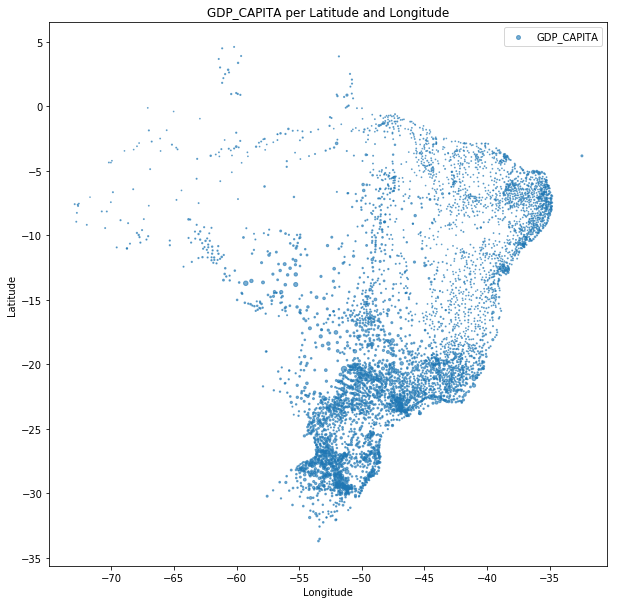

In [49]:
# remove zero values
mask1= df["LONG"] != 0
mask2 = df["LAT"] !=0 
mask3 = df['CAPITAL'] ==1
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("GDP_CAPITA per Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
scale_factor = 10000
plt.scatter(df[mask1&mask2]["LONG"], df[mask1&mask2]["LAT"], s=df[mask1&mask2]["GDP_CAPITA"]/scale_factor, alpha=0.6, label = 'GDP_CAPITA')
plt.legend()
plt.show()

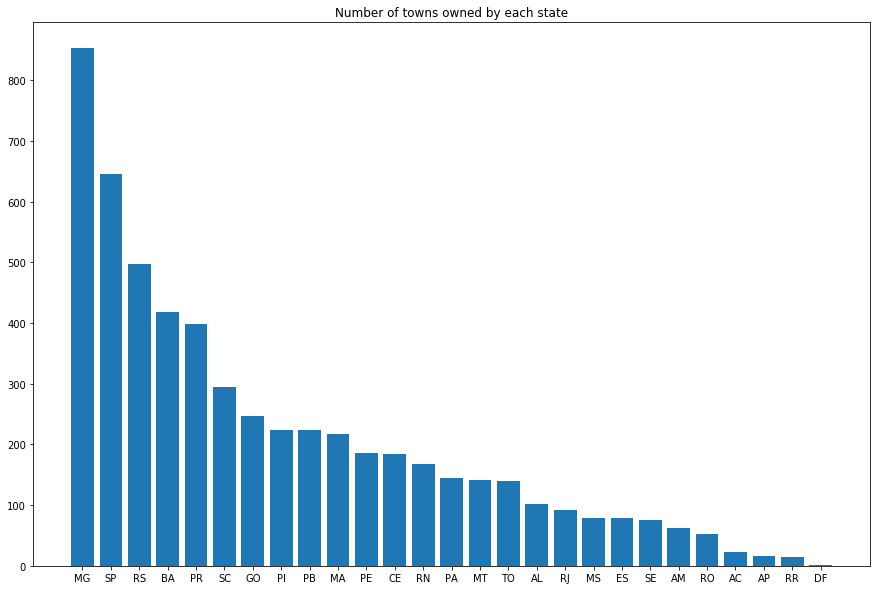

In [7]:
# 各州擁有城鎮圖
df["STATE"].value_counts()
plt.figure(figsize=(15,10))
x = df["STATE"].value_counts().index
y = df["STATE"].value_counts().values
plt.xticks(np.arange(len(x)), x) # 圖照順序排
plt.bar(np.arange(len(x)),y)
plt.title("Number of towns owned by each state")
plt.show()

In [8]:
# Foreign population
# total foreign population
print(f"total foreign population: {df['IBGE_RES_POP_ESTR'].sum():10.0f}")

total foreign population:     431313


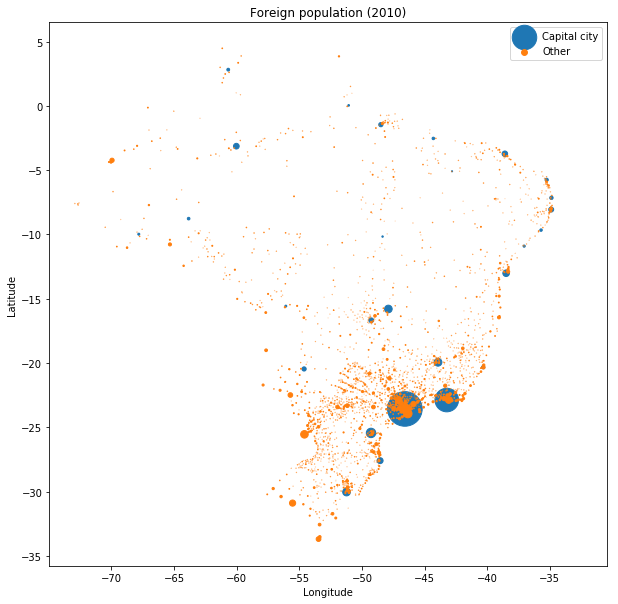

In [9]:
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Foreign population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
scale_factor = 100
plt.scatter(df[mask1&mask2&mask3]["LONG"], df[mask1&mask2&mask3]["LAT"], s=df[mask1&mask2&mask3]["IBGE_RES_POP_ESTR"]/scale_factor, alpha=1, label='Capital city')
plt.scatter(df[mask1&mask2&~mask3]["LONG"], df[mask1&mask2&~mask3]["LAT"], s=df[mask1&mask2&~mask3]["IBGE_RES_POP_ESTR"]/scale_factor, alpha=1, label='Other')
plt.legend()

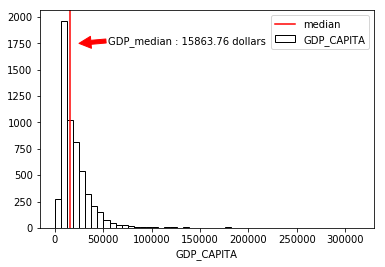

In [10]:
# 人均GDP直方圖
median = df['GDP_CAPITA'].median()
plt.hist(df['GDP_CAPITA'], edgecolor = 'black',color = 'white', label = "GDP_CAPITA", bins = 50)
plt.axvline(median, color = 'red', label = 'median') # 畫輔助線
plt.annotate(f'GDP_median : {median} dollars', xy=(25000, 1750), xytext=(55000, 1750), arrowprops = {'color':'red'})
plt.legend()
plt.xlabel('GDP_CAPITA')
plt.show()

In [11]:
# GDP和HDI
## remove zero values
mask1= df["GDP_CAPITA"] != 0
mask2 = df["IDHM"] !=0 
 
## create data
x = df[mask1&mask2]["GDP_CAPITA"]
y = df[mask1&mask2]["IDHM"]
z = df[mask1&mask2]["POP_GDP"]

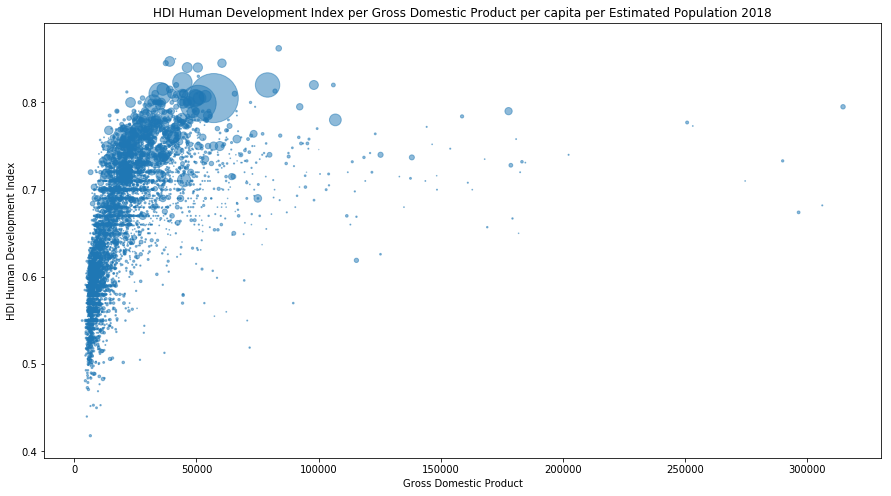

In [12]:
## use the scatter function
plt.figure(figsize=(15, 8))
plt.title("HDI Human Development Index per Gross Domestic Product per capita per Estimated Population 2018")
plt.xlabel("Gross Domestic Product")
plt.ylabel("HDI Human Development Index")
plt.scatter(x, y, s=z/5000, alpha=0.5)
plt.show()

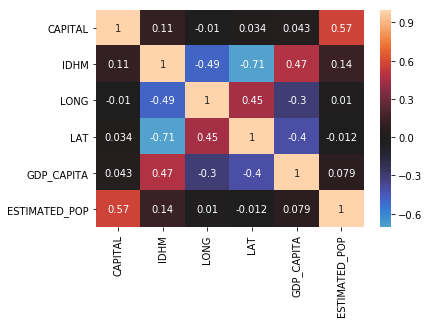

In [13]:
# Heatmap
plt.figure()
columns = ['STATE','CAPITAL','IDHM','LONG','LAT','AREA','GDP_CAPITA','ESTIMATED_POP']
df1 = df[columns]
corr = df1.corr()
sns.heatmap(corr, center = 0, annot = True)
plt.show()